Importing necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from ydata_profiling import ProfileReport


Loading the dataset to the dataframe

In [6]:
path="hour.csv"
data = pd.read_csv(path)

# Data Validation

In [7]:
# Checking the first 5 rows

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Checking the last 5 rows

data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
# Checking at the columns of the dataset

data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Changing the column names for better understanding using appropriate terms

columns = ['instant', 'dteday', 'season', 'yr', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total']
data.columns = columns

In [11]:
# Printing the shape/dimensions/number of rows and columns of the dataset

print(data.shape)

(17379, 17)


In [12]:
# Checking descriptive statistics of each feature in the dataframe

data.describe()

,instant,season,yr,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Assuming 'total' is the column name
mean_total = data['total'].mean()

print("Mean of the 'total' column:", mean_total)

Mean of the 'total' column: 189.46308763450142


In [14]:
# Assuming 'total' and 'year' are column names in your DataFrame
mean_total_by_year = data.groupby('yr')['total'].mean()

print("Mean of 'total' column by year:")
print(mean_total_by_year)

Mean of 'total' column by year:
yr
0    143.794448
1    234.666361
Name: total, dtype: float64


In [15]:
# Checking for the unique value counts in the dataframe per feature

data.nunique()

instant       17379
dteday          731
season            4
yr                2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
total           869
dtype: int64

In [16]:
# Checking for the null values in every feature

data.isna().sum()

instant       0
dteday        0
season        0
yr            0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

It was observed that none of the features had none values, no missing value handling needed to be performed, the dataset was well-structured.

In [17]:
# Dropping missing or null values if not captured

data = data.dropna()

In [18]:
# Checking the overall information of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  total       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
# Since the dataset had yyyy-mm-dd, only the year and day need to be extracted

data["year"] = data["dteday"].apply(lambda x :  datetime.strptime(x, '%Y-%m-%d').year)
data["day"] = data["dteday"].apply(lambda x :  datetime.strptime(x, '%Y-%m-%d').day)

# Dropping the unnecessary columns for our consideration

data.drop(columns=["instant","dteday","atemp","yr"],inplace=True)
data.head()

,season,month,hour,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,casual,registered,total,year,day
0,1,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011,1
1,1,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011,1
2,1,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32,2011,1
3,1,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13,2011,1
4,1,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,2011,1


# Exploratory Data Analysis (EDA)

<Axes: >

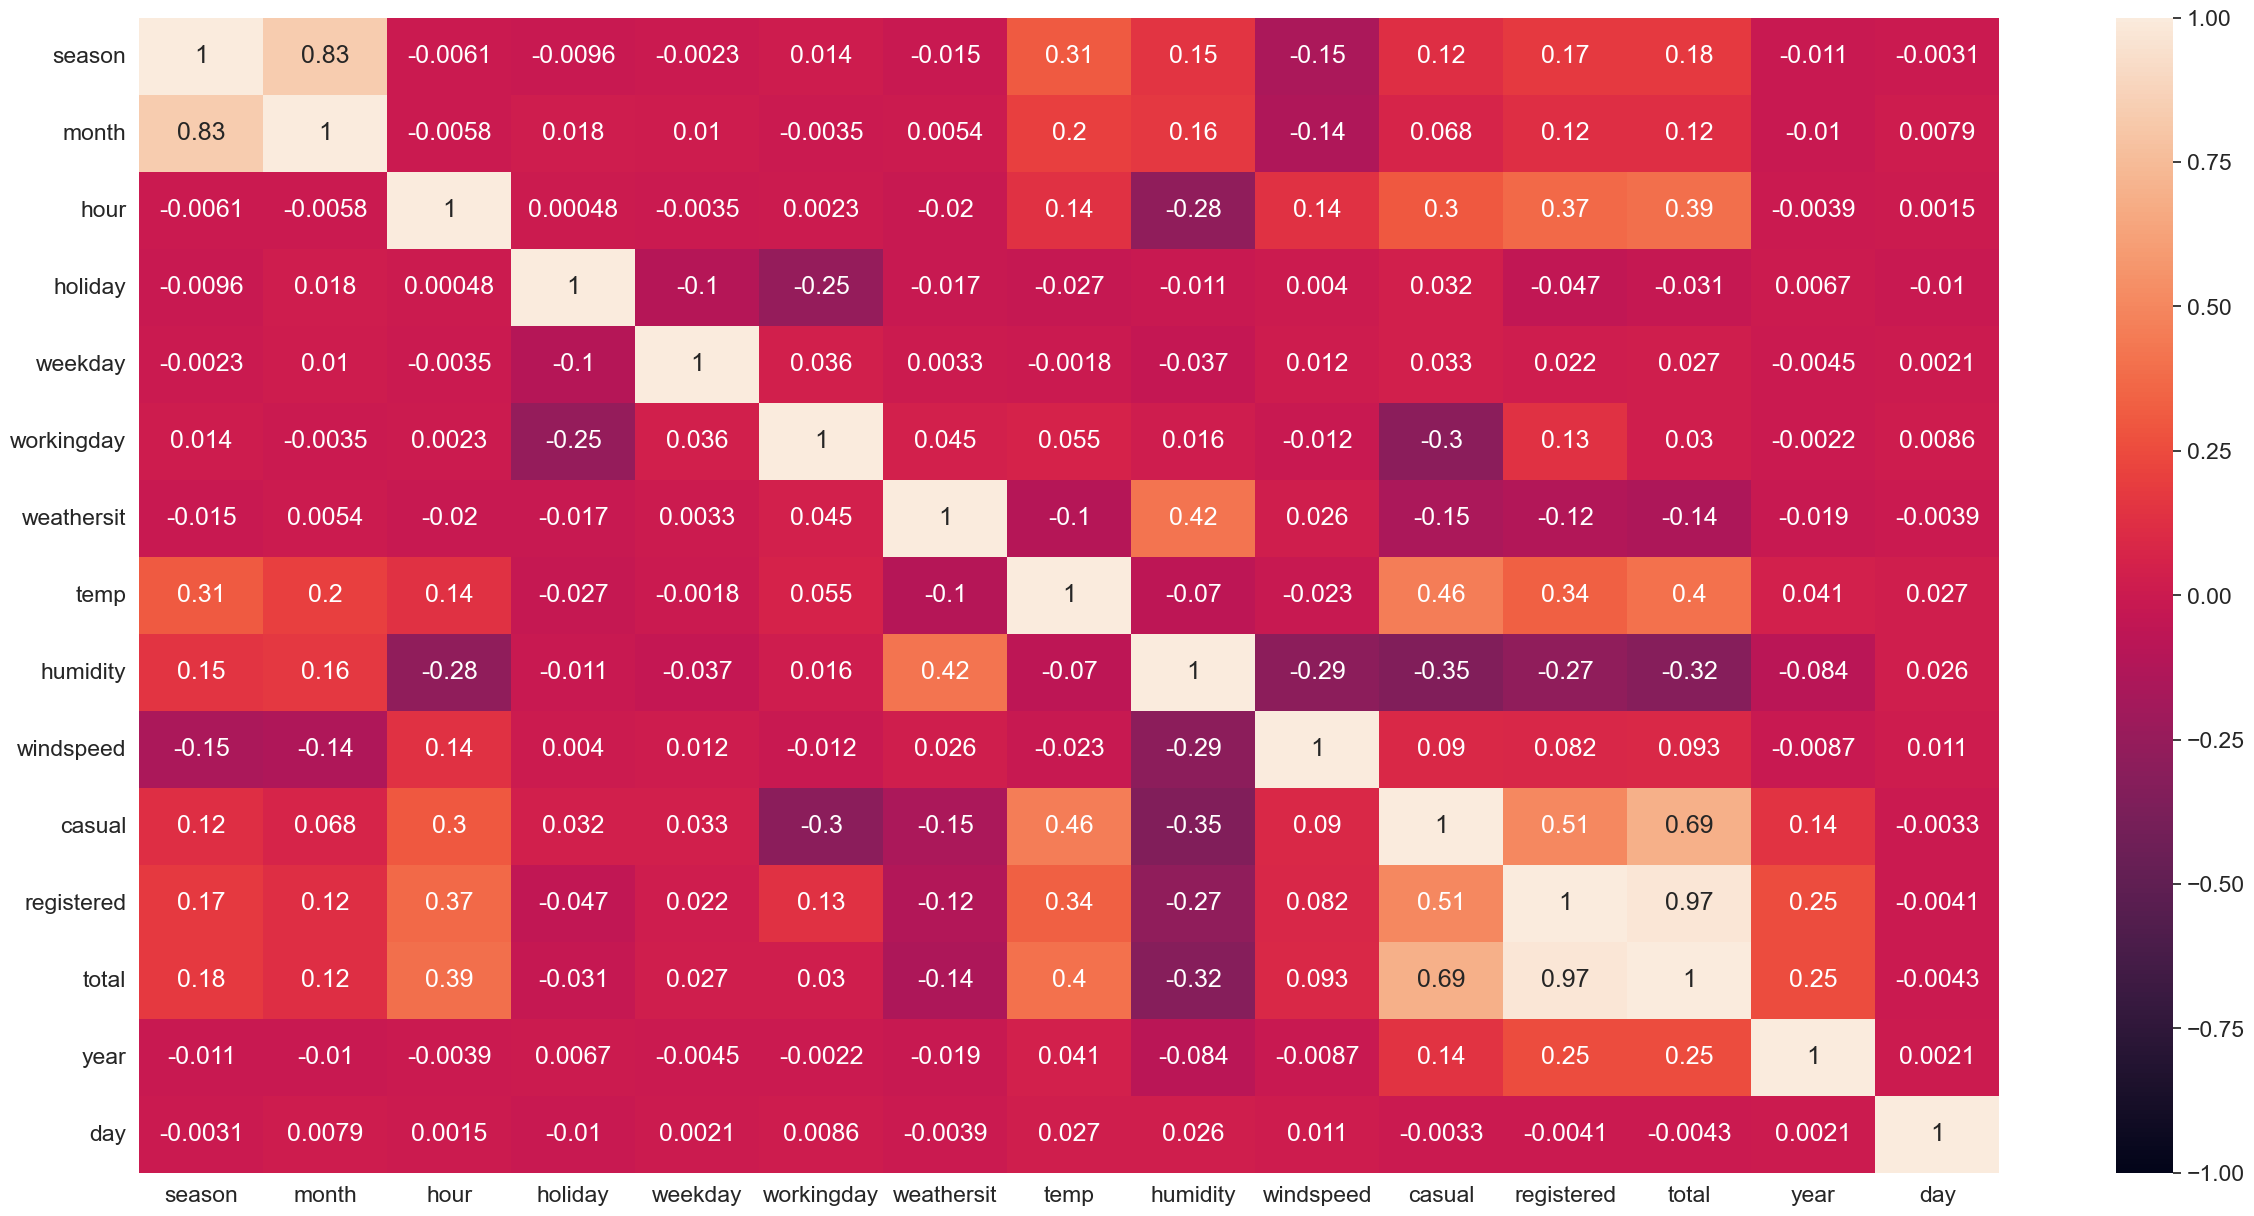

In [32]:
# Visualizing the correlation between numerical features

plt.figure(figsize=(30,15))
numerical_columns = data.select_dtypes(include=['number'])
sns.set(font_scale=1.5)
sns.heatmap(numerical_columns.corr(), vmin=-1, vmax=1, annot=True)

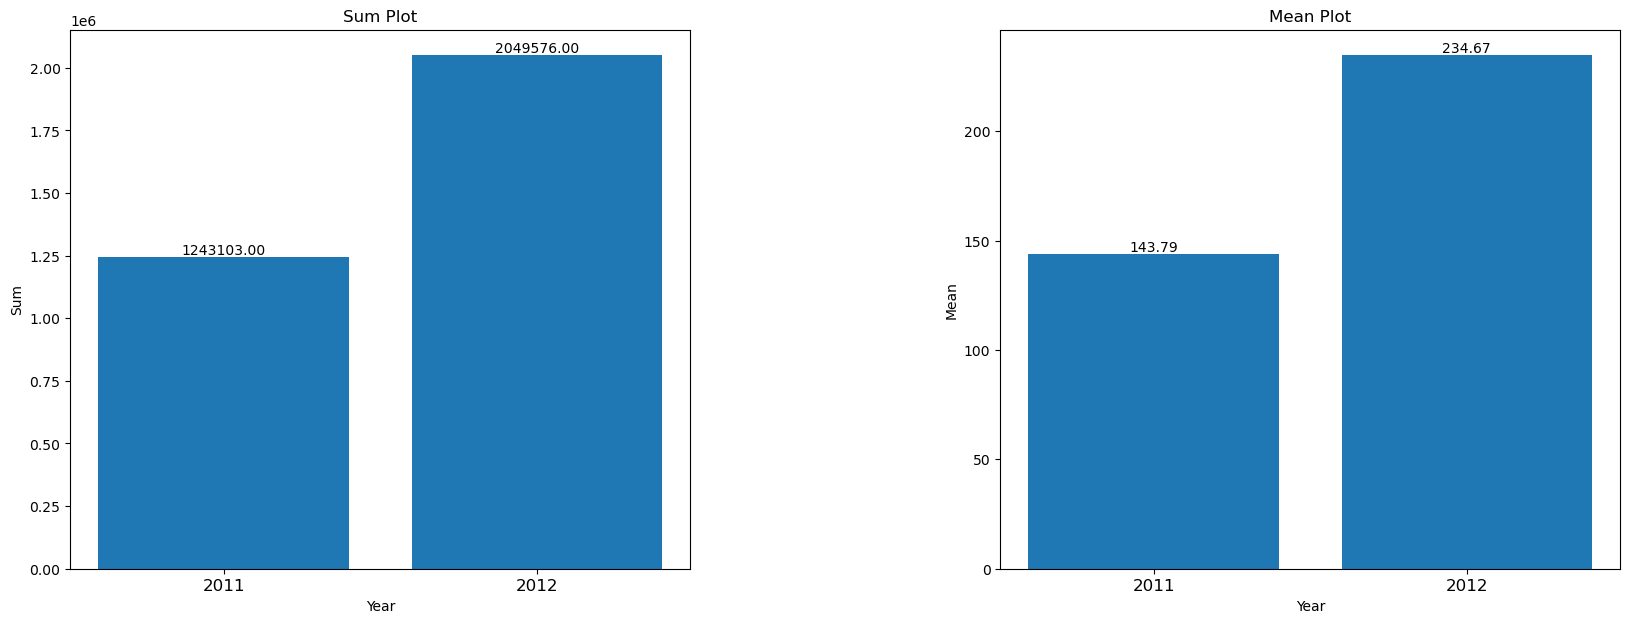

In [26]:
# Visualizing the mean rental count per hour for each year through a bar plot
 
grouped = data.groupby('year').agg({'total': ['count', 'mean', 'sum']})
grouped.columns = ['Count', 'Mean', 'Sum']
grouped.reset_index(inplace=True)

years = grouped['year']
means = grouped['Mean']
sums = grouped["Sum"]

plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.bar(years, sums)

for i, year in enumerate(years):
    plt.text(year, sums[i], f'{sums[i]:.2f}', ha='center', va="bottom")

plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Sum Plot')
plt.xticks(grouped['year'], fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(years, means)

for i, year in enumerate(years):
    plt.text(year, means[i], f'{means[i]:.2f}', ha='center', va="bottom")

plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean Plot')
plt.xticks(grouped['year'], fontsize=12)

plt.subplots_adjust(wspace=0.5)
plt.show()

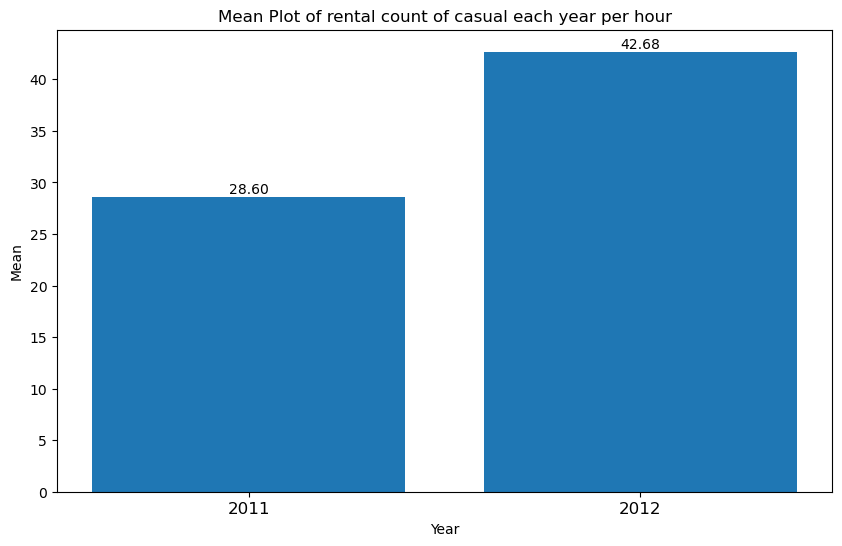

In [20]:
# Visualizing the mean rental count of casual for each year through a bar plot

grouped = data.groupby('year').agg({'casual': ['count', 'mean']})
grouped.columns = ['Count', 'Mean']
grouped.reset_index(inplace=True)

years = grouped['year']
means = grouped['Mean']

# setting the figure size of the plot
plt.figure(figsize=(10, 6))

plt.bar(years, means)

for i, year in enumerate(years):
    plt.text(year, means[i] , f'{means[i]:.2f}', ha='center',va="bottom")

plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean Plot of rental count of casual each year per hour')
plt.xticks(grouped['year'], fontsize=12) 
plt.show()

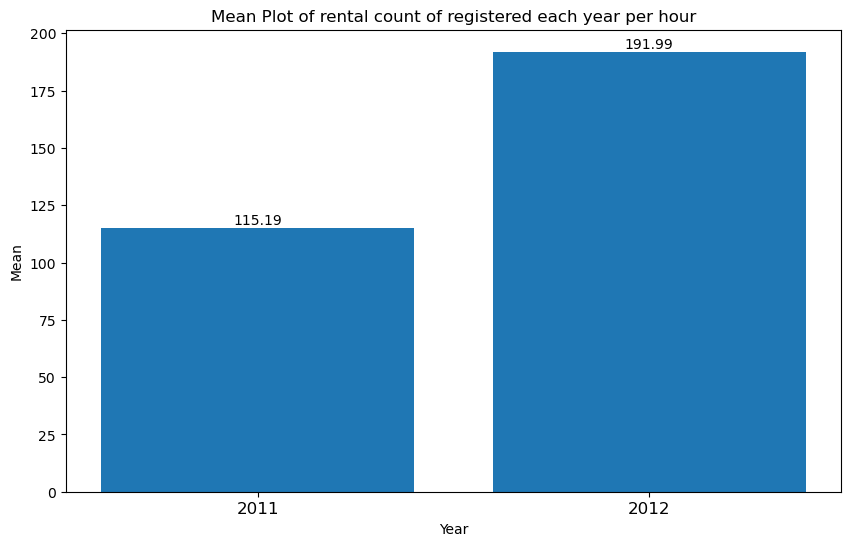

In [21]:
# Visualizing the mean rental count of registered for each year per hour through a bar plot

grouped = data.groupby('year').agg({'registered': ['count', 'mean']})
grouped.columns = ['Count', 'Mean']
grouped.reset_index(inplace=True)

years = grouped['year']
means = grouped['Mean']

# setting the figure size of the plot
plt.figure(figsize=(10, 6))

plt.bar(years, means)

for i, year in enumerate(years):
    plt.text(year, means[i] , f'{means[i]:.2f}', ha='center',va="bottom")

plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean Plot of rental count of registered each year per hour')
plt.xticks(grouped['year'], fontsize=12) 
plt.show()

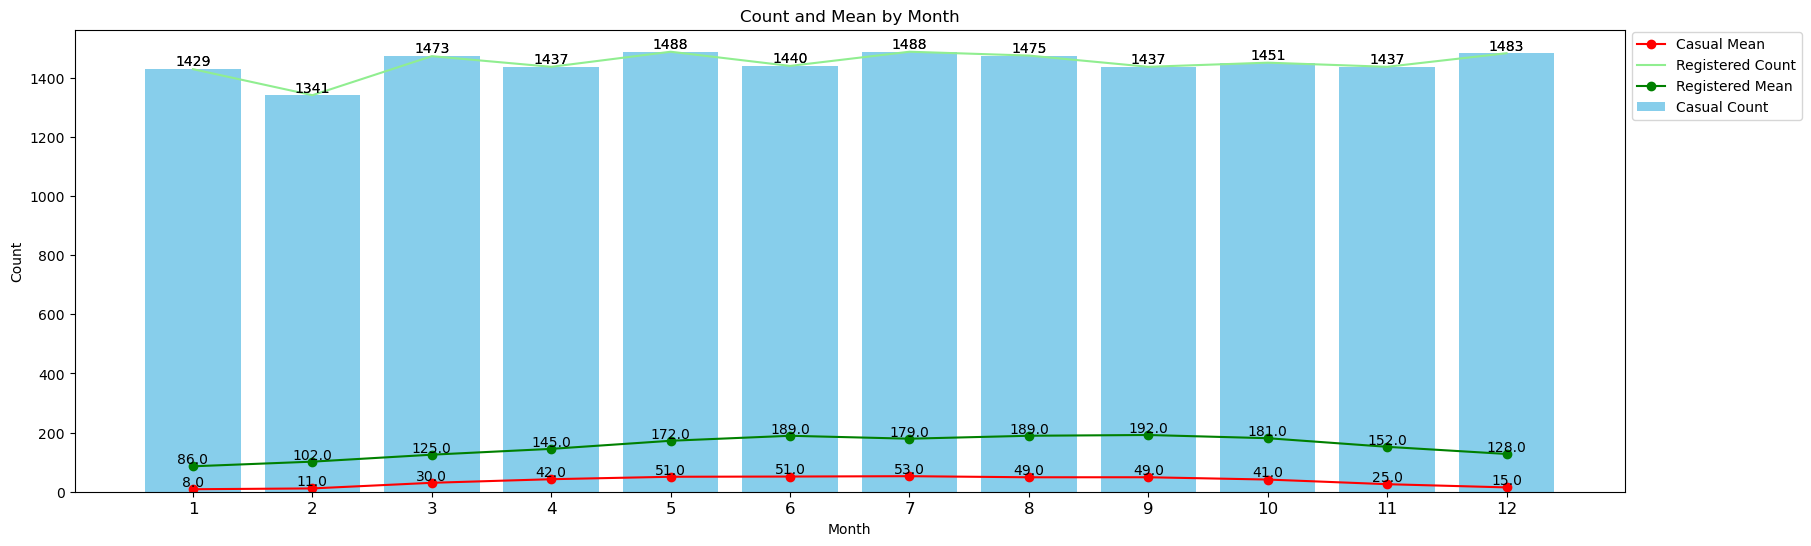

In [22]:
# Visualizing the mean rental count of casual for each month per hour through a bar plot

grouped_casual = data.groupby('month').agg({'casual': ['count', 'mean']})
grouped_casual.columns = ['Count', 'Mean']
grouped_casual.reset_index(inplace=True)

# Grouping by month and aggregating count and mean for registered
grouped_registered = data.groupby('month').agg({'registered': ['count', 'mean']})
grouped_registered.columns = ['Count', 'Mean']
grouped_registered.reset_index(inplace=True)

# Setting figure size
plt.figure(figsize=(20, 6))

# Plotting count and mean for casual
plt.bar(grouped_casual['month'], grouped_casual['Count'], color='skyblue', label='Casual Count')
plt.plot(grouped_casual['month'], grouped_casual['Mean'], color='red', marker='o', label='Casual Mean')

# Plotting count and mean for registered
plt.plot(grouped_registered['month'], grouped_registered['Count'], color='lightgreen', label='Registered Count')
plt.plot(grouped_registered['month'], grouped_registered['Mean'], color='green', marker='o', label='Registered Mean')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count and Mean by Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.xticks(grouped_casual['month'], fontsize=12) 

# Adding text labels for casual
for i, value in enumerate(grouped_casual['Count']):
    plt.text(i+1, value + 1, str(value), ha='center', va='bottom')

for i, value in enumerate(grouped_casual['Mean']):
    plt.text(i+1, value - 1, str(round(value, 0)), ha='center', va='bottom')

# Adding text labels for registered
for i, value in enumerate(grouped_registered['Count']):
    plt.text(i+1, value + 1, str(value), ha='center', va='bottom')

for i, value in enumerate(grouped_registered['Mean']):
    plt.text(i+1, value - 1, str(round(value, 0)), ha='center', va='bottom')

plt.show()

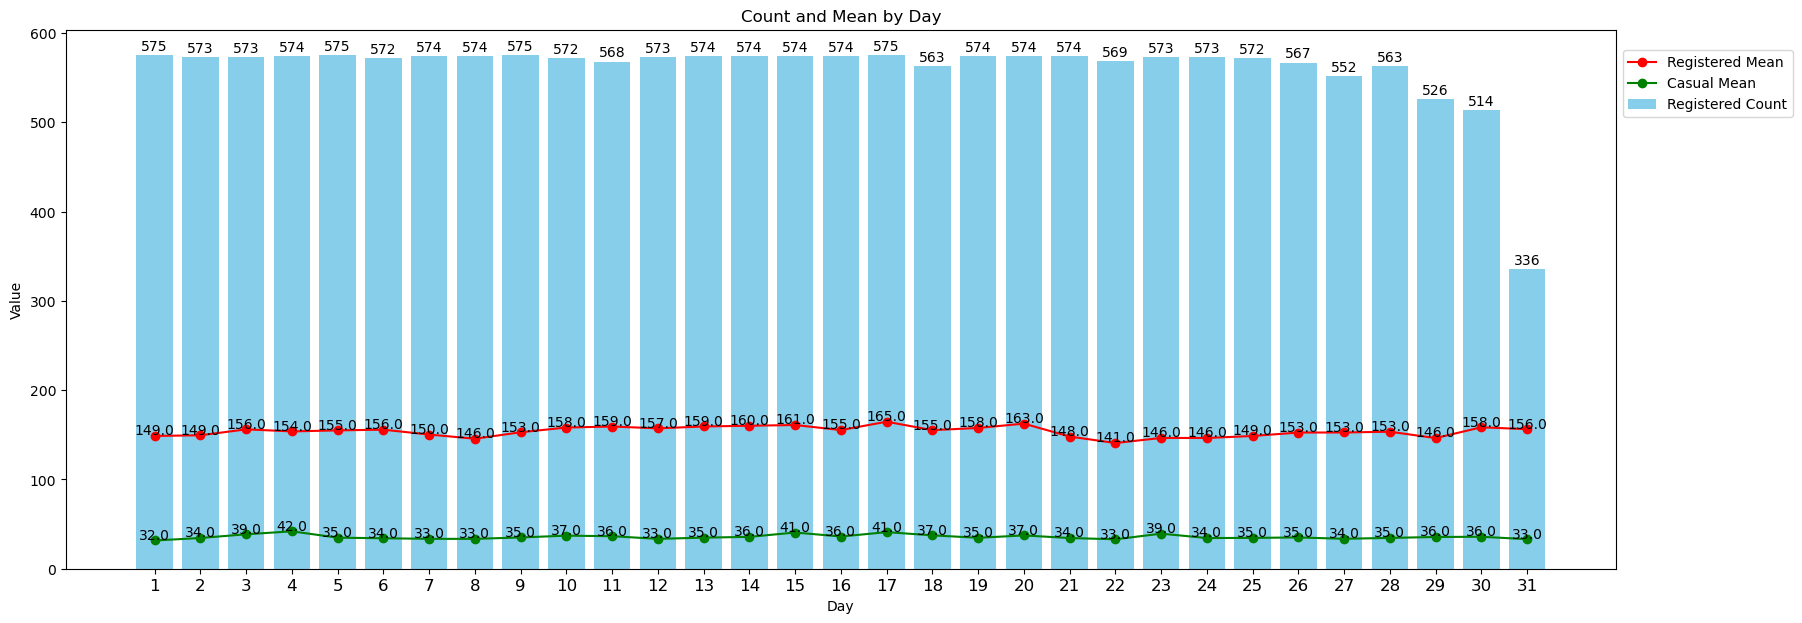

In [38]:
# Visualizing the mean rental count of registered and casual for each day through a bar plot

grouped_reg = data.groupby('day').agg({'registered': ['count', 'mean']})
grouped_casual = data.groupby('day').agg({'casual': ['count', 'mean']})

grouped_reg.columns = ['Count', 'Mean']
grouped_reg.reset_index(inplace=True)
grouped_casual.columns = ['Count', 'Mean']
grouped_casual.reset_index(inplace=True)

plt.figure(figsize=(20, 7))

plt.bar(grouped_reg['day'], grouped_reg['Count'], color='skyblue', label='Registered Count')
plt.plot(grouped_reg['day'], grouped_reg['Mean'], color='red', marker='o', label='Registered Mean')

plt.plot(grouped_casual['day'], grouped_casual['Mean'], color='green', marker='o', label='Casual Mean')

plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Count and Mean by Day')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.xticks(grouped_reg['day'], fontsize=12) 

for i, value in enumerate(grouped_reg['Count']):
    plt.text(i+1, value + 2, str(value), ha='center', va='bottom')

for i, value in enumerate(grouped_reg['Mean']):
    plt.text(i+1, value - 2, str(round(value, 0)), ha='center', va='bottom')

for i, value in enumerate(grouped_casual['Mean']):
    plt.text(i+1, value - 2, str(round(value, 0)), ha='center', va='bottom')

plt.show()

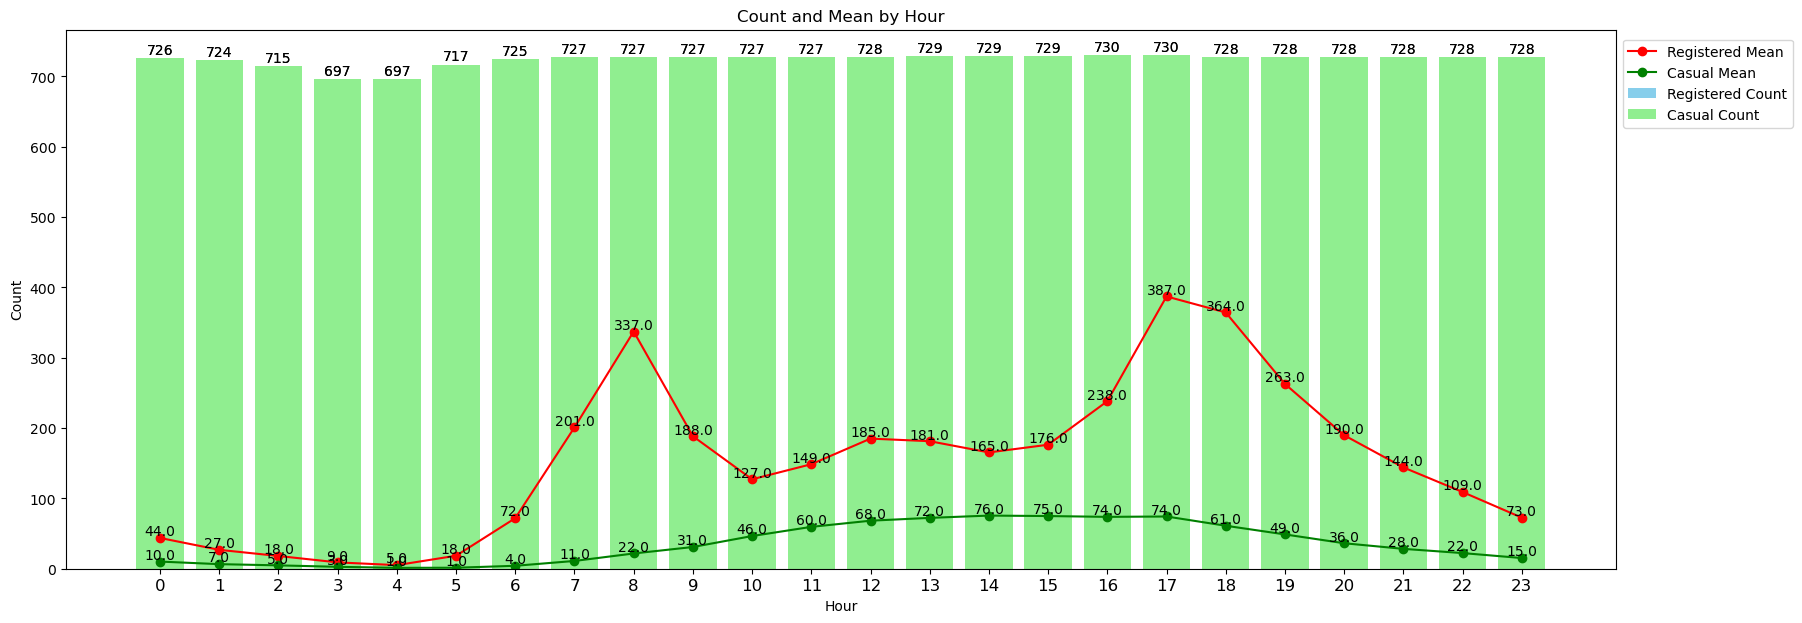

In [39]:
# Visualizing the mean rental count for each hour through a bar plot

grouped_reg = data.groupby('hour').agg({'registered': ['count', 'mean']})
grouped_casual = data.groupby('hour').agg({'casual': ['count', 'mean']})

grouped_reg.columns = ['Count', 'Mean']
grouped_reg.reset_index(inplace=True)

grouped_casual.columns = ['Count', 'Mean']
grouped_casual.reset_index(inplace=True)

plt.figure(figsize=(20, 7))

plt.bar(grouped_reg['hour'], grouped_reg['Count'], color='skyblue', label='Registered Count')
plt.plot(grouped_reg['hour'], grouped_reg['Mean'], color='red', marker='o', label='Registered Mean')

plt.bar(grouped_casual['hour'], grouped_casual['Count'], color='lightgreen', label='Casual Count')
plt.plot(grouped_casual['hour'], grouped_casual['Mean'], color='green', marker='o', label='Casual Mean')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count and Mean by Hour')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.xticks(grouped_reg['hour'], fontsize=12) 

for i, value in enumerate(grouped_reg['Count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

for i, value in enumerate(grouped_reg['Mean']):
    plt.text(i, value - 1, str(round(value, 0)), ha='center', va='bottom')

for i, value in enumerate(grouped_casual['Count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

for i, value in enumerate(grouped_casual['Mean']):
    plt.text(i, value - 1, str(round(value, 0)), ha='center', va='bottom')

plt.show()

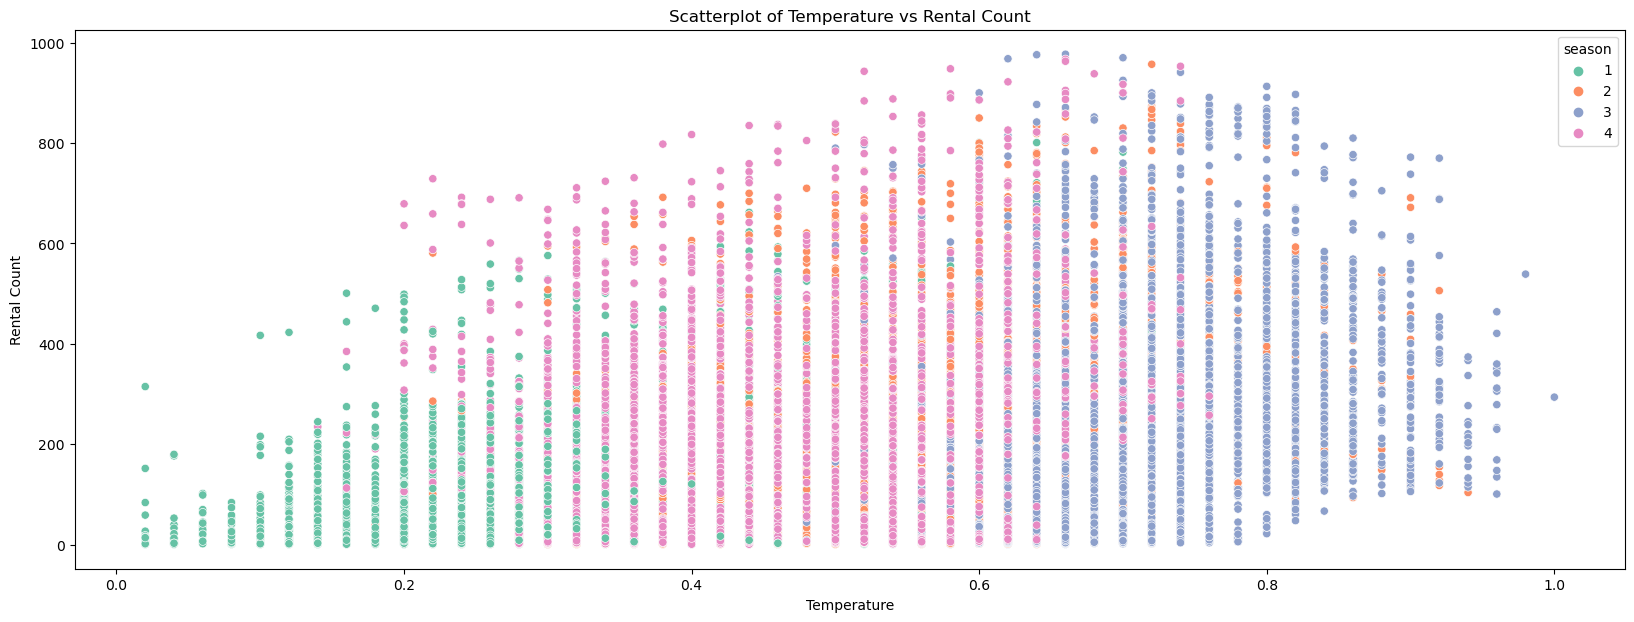

In [40]:
# Visualizing temperature vs total rent count per seasons through a scatter plot

plt.figure(figsize=(20, 7))
sns.scatterplot(x='temp', y='total', data=data,hue="season",palette='Set2')

plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.title('Scatterplot of Temperature vs Rental Count')


plt.show()

# Outliers detection

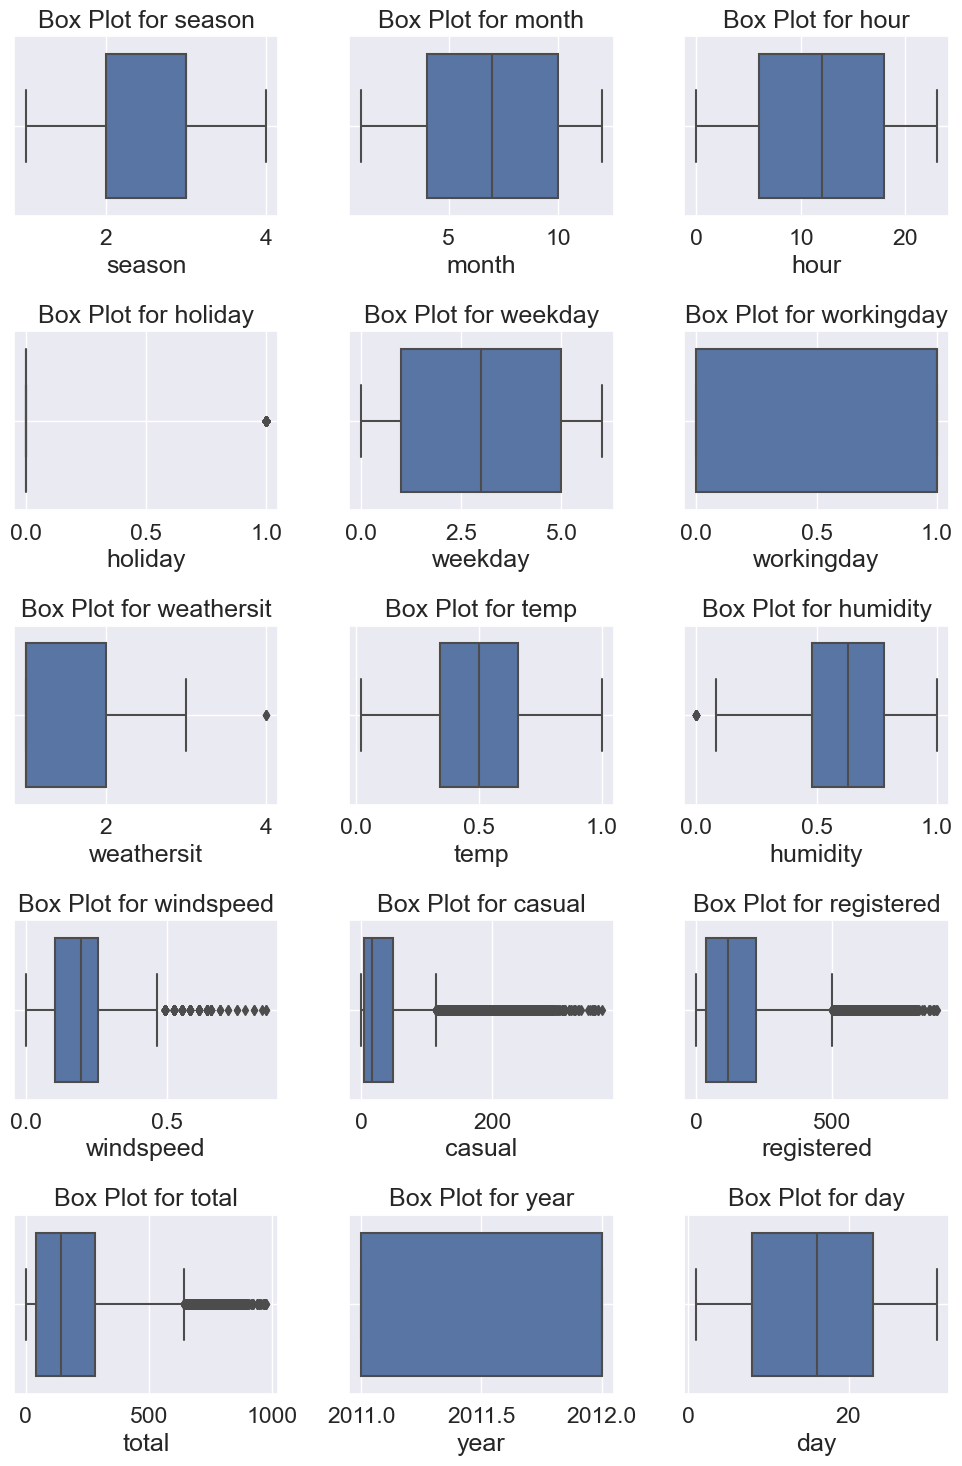

In [38]:
# Visualizing each numerical feature with a box plot to find outliers

num_columns = len(data.columns)
num_rows = (num_columns + 1) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3*num_rows))  

for i, column in enumerate(data.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[column], ax=axes[row][col])
    axes[row][col].set_title(f'Box Plot for {column}')
    axes[row][col].set_xlabel(column)
    axes[row][col].grid(True)


plt.tight_layout()
plt.show()

# Outliers treatment through Inter Quartile Range (IQR)

In [27]:
# As some of the features had outliers, removing them based on IQR

def remove_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
 
data = remove_outliers(data)

In [28]:
# Finding the shape of the dataframe after outlier removal

data.shape

(14534, 15)

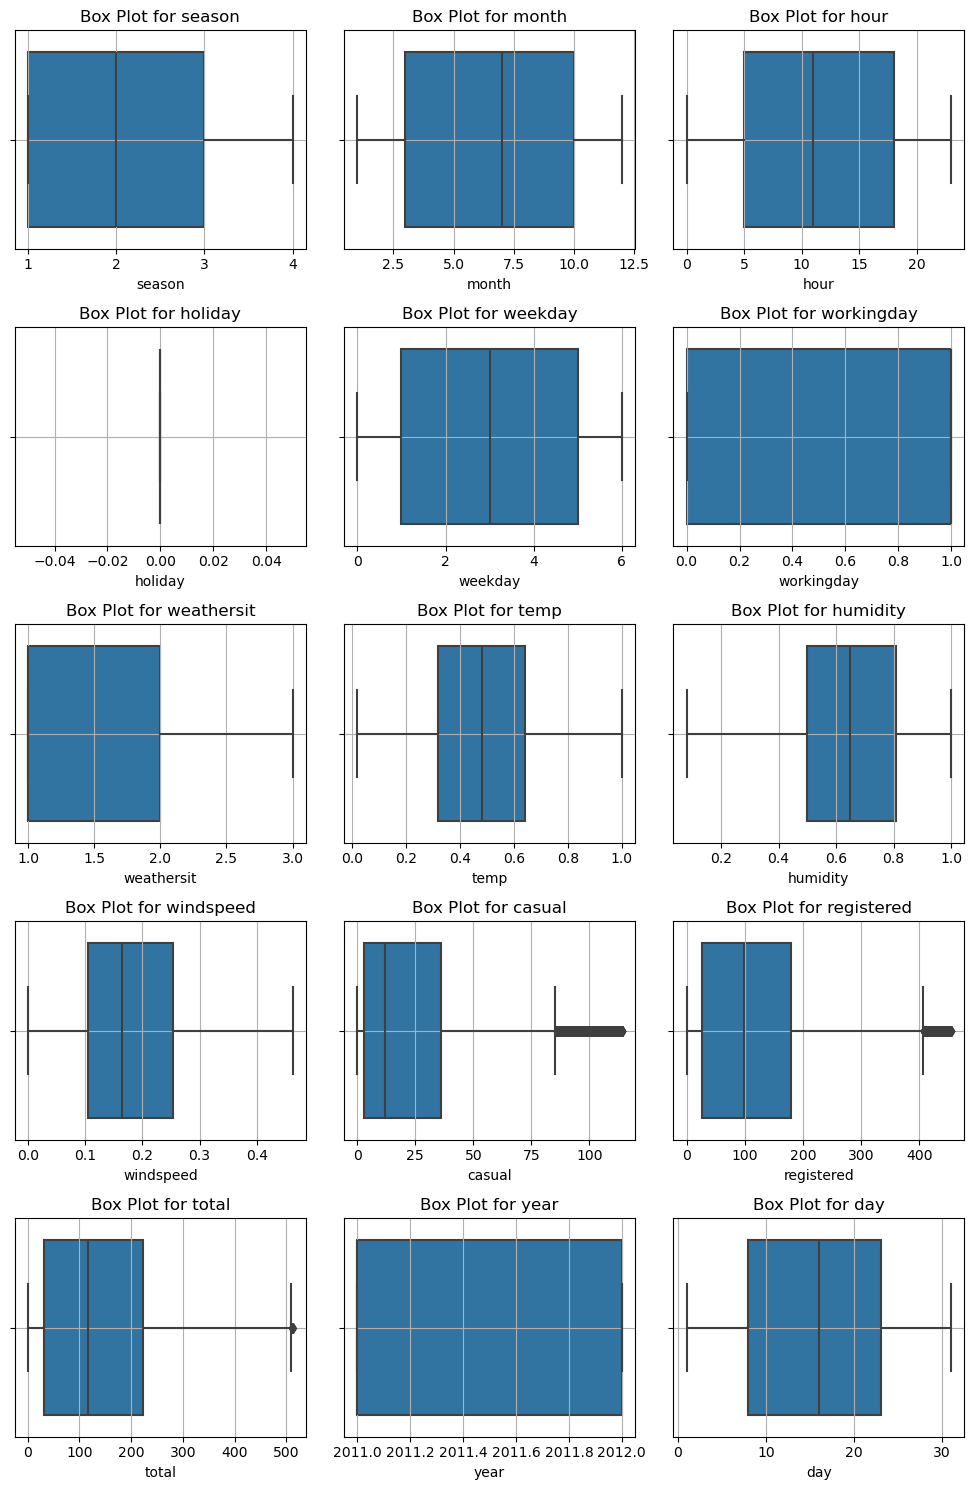

In [29]:
# Plotting the features again after the removal of outliers through box plots

num_columns = len(data.columns)
num_rows = (num_columns + 1) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3*num_rows))  

for i, column in enumerate(data.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[column], ax=axes[row][col])
    axes[row][col].set_title(f'Box Plot for {column}')
    axes[row][col].set_xlabel(column)
    axes[row][col].grid(True)


plt.tight_layout()
plt.show()

IQR technique was employed for Outliers treatment. However, some of the features like Casual, Registered and total still had some outliers remaining, dropping them would decrease the overall size of the dataset massively. 

In [42]:
#  Generating html profile

profile = ProfileReport(data, title="Dataset Profile", explorative=True, minimal=True)
profile.to_file("profile.html")

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# Setting the features and target variable 

X= data.drop(columns=["casual","registered","total"])
y = data["total"]

# Feature Scaling

In [31]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

# Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor

In [33]:
# Initializing the XGBoost regressor and fitting the training dataset into the model

xgboost = xgb.XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
# Initilizing output instances

result = {}
result["regressor"]=[]
result["mse"]=[]
result["rmse"]=[]
result["mae"]=[]
result["r2"]=[]

# Model Evaluation

In [35]:
# Model Evaluation on Testing Dataset

y_pred = xgboost.predict(X_test)

print("Performance Evalution of XGBoost on the Test dataset\n")
print("----------------------------------------------------\n")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("xgboost_test")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)

Performance Evalution of XGBoost on the Test dataset

----------------------------------------------------

Mean Squared Error: 987.6032898164555
Root Mean Squared Error: 31.426156141285485
Mean Absolute Error: 20.40139408804038
R-squared (R2) Score: 0.9333920735007636


In [36]:
# Model Evaluation on Training Dataset

y_pred = xgboost.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

print("Performance Evalution of XGBoost on the Train dataset\n")
print("----------------------------------------------------\n")

print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_train, y_pred)
print("R-squared (R2) Score:", r2)


result["regressor"].append("xgboost_train")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)

Performance Evalution of XGBoost on the Train dataset

----------------------------------------------------

Mean Squared Error: 368.35226278510885
Root Mean Squared Error: 19.19250538061951
Mean Absolute Error: 12.957275674619192
R-squared (R2) Score: 0.975339408557094


It is evident that the model is performing better on the training dataset than that of the testing dataset regarding all the performance metrices. The errors, being lower on the training dataset indicates that the model is fitting well on the training data. However, it can also be seen that the model is slightly overfitting on the test dataset when compared with the training dataset.

# Hyperparameter Tuning with GridSearchCV

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_depth': [3, 4, 5, 10], 
    'learning_rate': [0.5, 0.1, 0.01, 0.001]  
}

xgboost = xgb.XGBRegressor(random_state=42)
grid_search_cv = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_cv.fit(X_train, y_train)

print("Best parameters:", grid_search_cv.best_params_)

best_xgboost = grid_search_cv.best_estimator_

y_pred = best_xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("\nAfter Hyperparameter Tuning\n")

print("\nPerformance Evalution of XGBoost on the Test dataset\n")
print("----------------------------------------------------\n")

print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("xgboost_tuned_test")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}

After Hyperparameter Tuning


Performance Evalution of XGBoost on the Test dataset

----------------------------------------------------

Mean Squared Error: 925.3925803528396
Root Mean Squared Error: 30.420265948095185
Mean Absolute Error: 18.885662520691973
R-squared (R2) Score: 0.9375878132336557


In [39]:
# Model Evaluation on Training Dataset

y_pred = best_xgboost.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

print("\nAfter Hyperparameter Tuning\n")

print("\nPerformance Evalution of XGBoost on the Train dataset\n")
print("----------------------------------------------------\n")

print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_train, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("xgboost_tuned_train")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)


After Hyperparameter Tuning


Performance Evalution of XGBoost on the Train dataset

----------------------------------------------------

Mean Squared Error: 1.468742096860875
Root Mean Squared Error: 1.2119167037634537
Mean Absolute Error: 0.7931748105955894
R-squared (R2) Score: 0.9999016700793099


# LightGBM Regressor

In [40]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
params = {
    'objective': 'regression',
    'metric': 'mse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 31,
    'learning_rate': 0.05
}

num_round = 1000
lgb_reg = lgb.train(params, lgb_train, num_round, valid_sets=[lgb_train, lgb_test], callbacks=[lgb.early_stopping(stopping_rounds=20)])

y_pred = lgb_reg.predict(X_test, num_iteration=lgb_reg.best_iteration)

# Model Evaluation on Testing Dataset


mse = mean_squared_error(y_test, y_pred)
print("\n----------------------------------------------------")

print("\nPerformance Evalution of XGBoost on the Test dataset\n")
print("----------------------------------------------------\n")
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("light_gbm_test")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 11627, number of used features: 11
[LightGBM] [Info] Start training from score 142.081104
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[998]	training's l2: 296.498	valid_1's l2: 875.84

----------------------------------------------------

Performance Evalution of XGBoost on the Test dataset

----------------------------------------------------

Mean Squared Error: 875.8395839074904
Root Mean Squared Error: 29.594587071075857
Mean Absolute Error: 18.554544308380475
R-squared (R2) Score: 0.9409298660387473


In [41]:
y_pred = lgb_reg.predict(X_train, num_iteration=lgb_reg.best_iteration)
mse = mean_squared_error(y_train, y_pred)

print("\n----------------------------------------------------")

print("\nPerformance Evalution of XGBoost on the Train dataset\n")
print("----------------------------------------------------\n")

print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_train, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("light_gbm_train")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)


----------------------------------------------------

Performance Evalution of XGBoost on the Train dataset

----------------------------------------------------

Mean Squared Error: 296.49804791830746
Root Mean Squared Error: 17.219118674261683
Mean Absolute Error: 11.612656585882831
R-squared (R2) Score: 0.9801499326540091


# Hyperparameter Tuning with GridSearchCV

In [42]:
lgb_model = lgb.LGBMRegressor()

param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search_cv = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search_cv.fit(X_train, y_train)

print("Best parameters found:", grid_search_cv.best_params_)

best_lgb_model = grid_search_cv.best_estimator_

y_pred = best_lgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("\nAfter Hyperparameter Tuning\n")

print("\nPerformance Evalution of XGBoost on the Test dataset\n")
print("----------------------------------------------------\n")
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("light_gbm_tuned_test")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 7751, number of used features: 11
[LightGBM] [Info] Start training from score 142.302026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 7751, number of used features: 11
[LightGBM] [Info] Start training from score 141.781577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [43]:
y_pred = best_lgb_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

print("\nAfter Hyperparameter Tuning\n")

print("\nPerformance Evalution of XGBoost on the Train dataset\n")
print("----------------------------------------------------\n")
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_train, y_pred)
print("R-squared (R2) Score:", r2)

result["regressor"].append("light_gbm_tuned_train")
result["mse"].append(mse)
result["rmse"].append(rmse)
result["mae"].append(mae)
result["r2"].append(r2)


After Hyperparameter Tuning


Performance Evalution of XGBoost on the Train dataset

----------------------------------------------------

Mean Squared Error: 288.00810628497555
Root Mean Squared Error: 16.97080158050808
Mean Absolute Error: 11.587087941572785
R-squared (R2) Score: 0.9807183205890002


In [44]:
# saveing all the results evaluation metrices obtained and saving them to a dataframe

df = pd.DataFrame(result)
print(df)

               regressor         mse       rmse        mae        r2
0           xgboost_test  987.603290  31.426156  20.401394  0.933392
1          xgboost_train  368.352263  19.192505  12.957276  0.975339
2     xgboost_tuned_test  925.392580  30.420266  18.885663  0.937588
3     xgboost_tuned_test  925.392580  30.420266  18.885663  0.937588
4    xgboost_tuned_train    1.468742   1.211917   0.793175  0.999902
5         light_gbm_test  875.839584  29.594587  18.554544  0.940930
6        light_gbm_train  296.498048  17.219119  11.612657  0.980150
7   light_gbm_tuned_test  915.453943  30.256469  19.139503  0.938258
8  light_gbm_tuned_train  288.008106  16.970802  11.587088  0.980718


The table above shows the evaluation results of both the regression algorithms on both the training and testing datasets. Hyperparameter Tuning with GridSearchCV was performed on both the models. Each instances of the result were thoroughly observed and analyzed to conclude the best model.

Observations from the evaluation results:

-> Both the models showed an increase in performance after GridSearchCV was applied.
-> The errors, MSE and RMSE for XGBoost were slightly less than that of LGBM, which suggested
   that XGBoost performs better in minimizing errors.
-> Light GBM, on the other hand, has a bit high R2 scores, which indicates that LGBM is 
   better
   fitting the data.
-> Even after hyperparameter tuning, both the models tend to potentially overfit.
-> The comparison of evalution results hights the performances of both the models, where
   XGBoost was observed to be better in minimizing the errors while LGBM was better with R2 score. The selection of the model depends upon specific requirements. 